# 🔧 1. Definindo o problema

Vamos usar Deep Learning para prever a temperatura em Fahrenheit a partir da temperatura em Celsius.

A fórmula tradicional seria:

**F = 1.8*C + 32**

Mas em vez da fórmula, vamos ensinar a rede a aprender essa relação com dados.

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 📋 2. Preparar os dados

In [2]:
# Lista de temperaturas em Celsius (entrada)
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)

# Temperaturas correspondentes em Fahrenheit (rótulo/target)
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype=float)

# 🧠 3. Construir o modelo com Keras (TensorFlow)

In [3]:
# Modelo sequencial simples com 1 neurônio (regressão linear)
model = keras.Sequential([
    keras.Input(shape=(1,)),
    layers.Dense(units=1)
])

# ⚙️ 4. Compilar o modelo

In [4]:
#model.compile(optimizer='adam',loss='mean_squared_error')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), loss='mse')

# 🏋️ 5. Treinar o modelo

In [5]:
# Treinamento
history = model.fit(celsius,fahrenheit,epochs=700,verbose=0)

# 📈 5.1 Visualização da perda
### Você pode visualizar a evolução da perda:

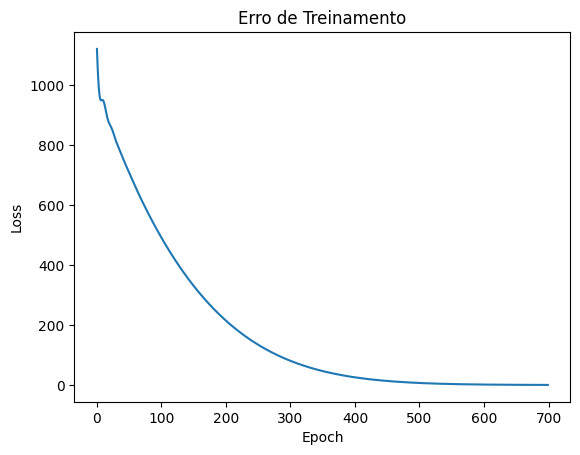

In [6]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Erro de Treinamento')
plt.show()

# 🔍 6. Testar o modelo

In [7]:
# Previsão com entrada correta
entrada = np.array([[100.0]])
saida = model.predict(entrada)
print(f"🌡️  Previsão para 100 °C: {saida[0][0]:.2f} °F")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
🌡️  Previsão para 100 °C: 211.92 °F


# 🧮 7. Visualizar pesos aprendidos (equivalentes à equação linear y = m*x + b)

In [8]:
weights = model.get_weights()
print(f"Peso (inclinação): {weights[0][0][0]:.2f}")
print(f"Bias (intercepto): {weights[1][0]:.2f}")
print(f"Equação aprendida: y = {weights[0][0][0]:.2f} * x + {weights[1][0]:.2f}")

Peso (inclinação): 1.80
Bias (intercepto): 31.47
Equação aprendida: y = 1.80 * x + 31.47


In [10]:
import os

# Cria a pasta se não existir
os.makedirs('modelo_salvo',exist_ok=True)

# Salva o modelo em formato HDF5 (.h5)
model.save('modelo_salvo/modelo_rede_neural_temperatura.keras')

In [ ]:
#from tensorflow.keras.models import load_model

# Carrega o modelo salvo
#modelo_carregado = load_model('modelos_salvos/modelo_rede_neural.keras')

# Usar o modelo para prever
#predicao = modelo_carregado.predict(novos_dados)
